In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.dates as mdates



In [3]:
my_path=r"C:\DS\matplotlibandseaborn\digital_activity_100days.csv"

my_data=pd.read_csv(my_path,index_col="Date")


In [4]:
my_data

,Screen Time (hrs),Messages,Emails,Websites Visited,Files Created,Most Used Apps,Most Active Contacts,Most Used Words,Emails Received,Emails Sent,Most Active Email Hour,Active Browsing Hours
Date,,,,,,,,,,,,
25-05-21,5.4,157,16,78,8,"WhatsApp, Slack, Twitter","Bob: 60, David: 55, Charlie: 42","hello, great, thanks, please, no",11,5,6,"(7, 19)"
25-05-22,4.9,143,16,74,5,"Gmail, WhatsApp, YouTube","Alice: 47, David: 50, Charlie: 46","please, okay, sure, no, fine",11,5,21,"(8, 21)"
25-05-23,5.5,186,25,52,6,"Slack, Twitter, WhatsApp","David: 62, Eve: 65, Alice: 59","great, no, okay, hello, yes",20,5,10,"(8, 20)"
25-05-24,6.2,161,13,75,10,"Facebook, WhatsApp, Slack","Frank: 46, Eve: 54, Bob: 61","later, sure, please, no, yes",10,3,23,"(8, 21)"
25-05-25,4.8,155,11,62,3,"Twitter, Facebook, Slack","Alice: 55, Bob: 43, Frank: 57","no, yes, later, sure, okay",6,5,0,"(8, 19)"
...,...,...,...,...,...,...,...,...,...,...,...,...
25-08-24,3.8,155,19,67,7,"Chrome, Telegram, Gmail","Charlie: 51, Eve: 46, David: 58","thanks, yes, please, no, hello",14,5,22,"(7, 20)"
25-08-25,5.2,160,9,77,14,"YouTube, Gmail, Twitter","Frank: 37, Charlie: 60, Bob: 63","hello, thanks, sure, okay, no",5,4,16,"(7, 19)"
25-08-26,5.2,166,21,82,9,"Telegram, Slack, Chrome","Frank: 55, David: 51, Charlie: 60","no, later, thanks, fine, great",12,9,14,"(7, 19)"


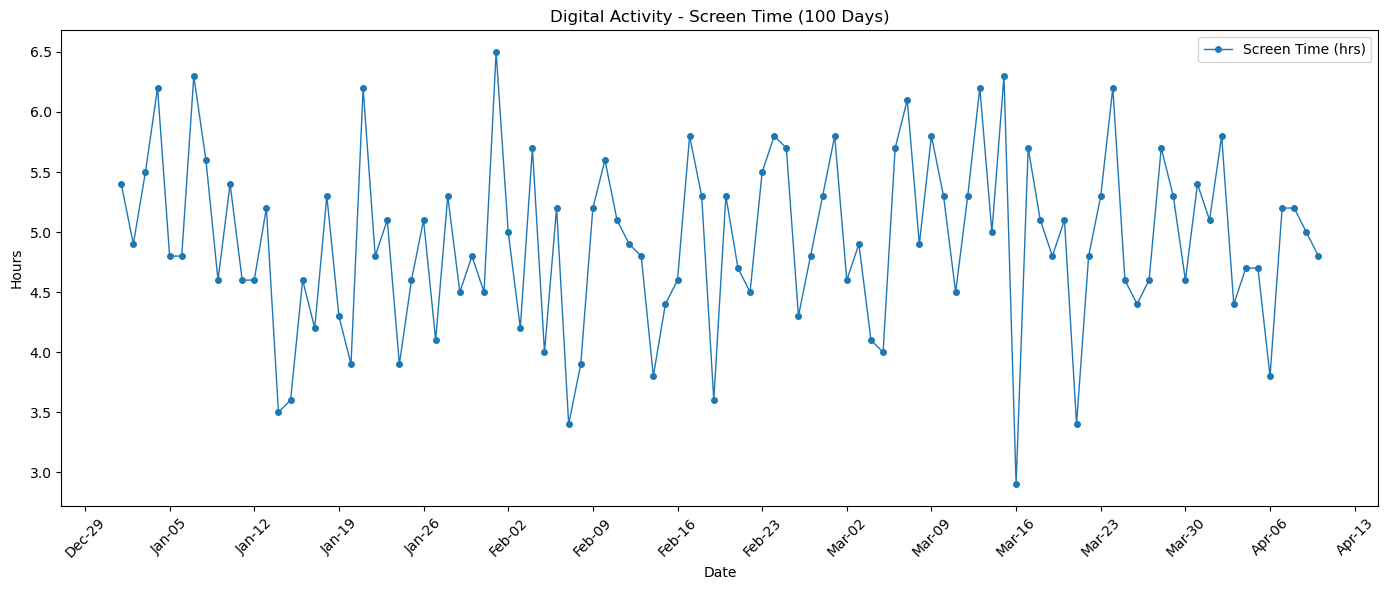

In [5]:




import matplotlib.pyplot as plt
import matplotlib.dates as mdates

plt.figure(figsize=(14,6))
plt.plot(my_data.index, my_data["Screen Time (hrs)"], label="Screen Time (hrs)", marker="o", markersize=4, linewidth=1)

# ✅ Show fewer x-axis labels (every 7th day → weekly)
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=7))

# ✅ Format dates shorter, e.g. "Jun-01"
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b-%d'))

# Rotate labels nicely
plt.xticks(rotation=45)

plt.xlabel("Date")
plt.ylabel("Hours")
plt.title("Digital Activity - Screen Time (100 Days)")
plt.legend()
plt.tight_layout()
plt.show()


In [6]:
print(my_data.columns)


Index(['Screen Time (hrs)', 'Messages', 'Emails', 'Websites Visited',
       'Files Created', 'Most Used Apps', 'Most Active Contacts',
       'Most Used Words', 'Emails Received', 'Emails Sent',
       'Most Active Email Hour', 'Active Browsing Hours'],
      dtype='object')


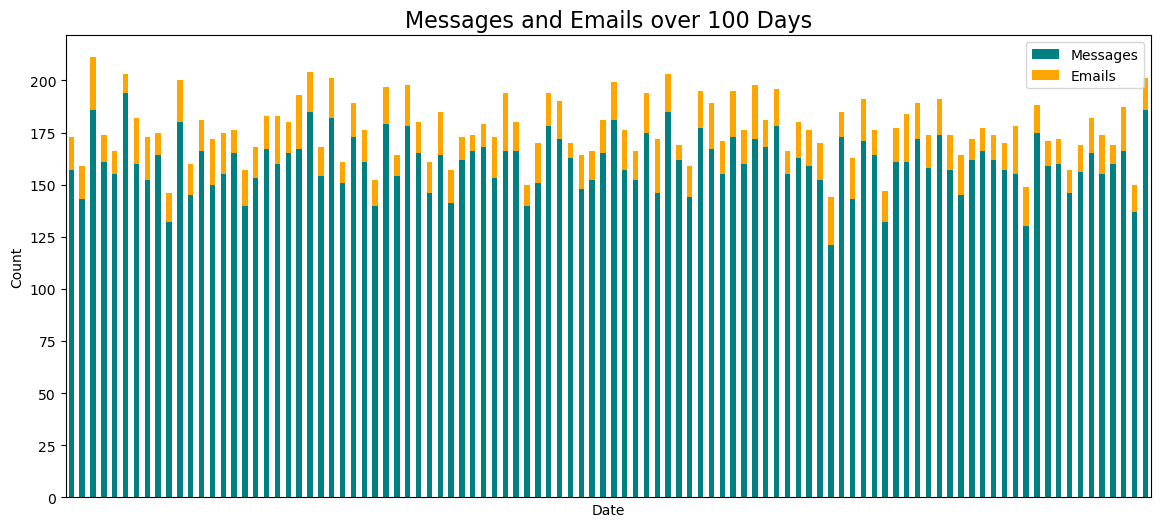

In [7]:
#2. Messages vs Emails (Stacked Bar Chart)
my_data[['Messages','Emails']].plot(
    kind="bar", stacked=True, figsize=(14,6), color=["teal","orange"])
plt.title("Messages and Emails over 100 Days", fontsize=16)
plt.xlabel("Date")
plt.ylabel("Count")
plt.xticks([], [])   # Hide dates to avoid clumsiness
plt.show()

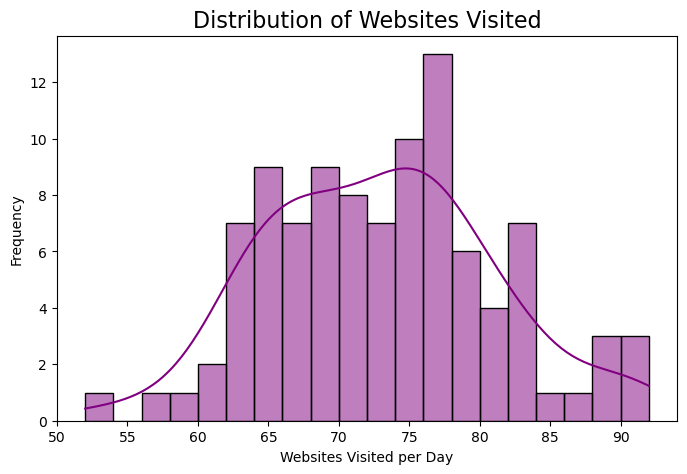

In [8]:
#3. Website Visits Distribution (Histogram)
plt.figure(figsize=(8,5))
sns.histplot(my_data["Websites Visited"], bins=20, kde=True, color="purple")
plt.title("Distribution of Websites Visited", fontsize=16)
plt.xlabel("Websites Visited per Day")
plt.ylabel("Frequency")
plt.show()

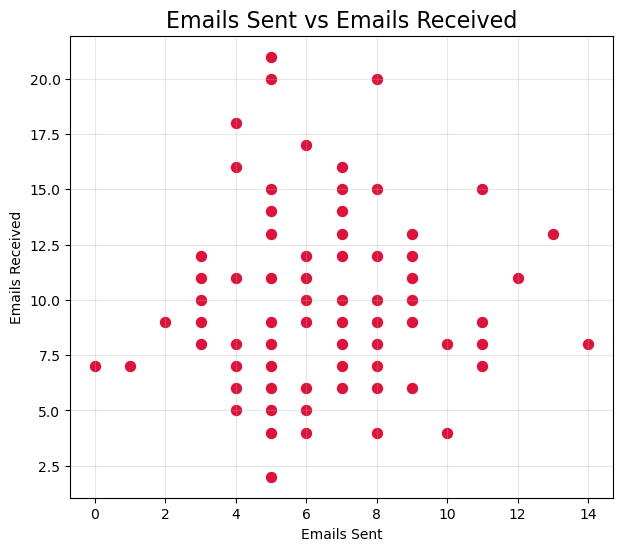

In [9]:
#4. Emails Sent vs Emails Received (Scatter)
plt.figure(figsize=(7,6))
sns.scatterplot(data=my_data, x="Emails Sent", y="Emails Received", color="crimson", s=80)
plt.title("Emails Sent vs Emails Received", fontsize=16)
plt.xlabel("Emails Sent")
plt.ylabel("Emails Received")
plt.grid(True, alpha=0.3)
plt.show()

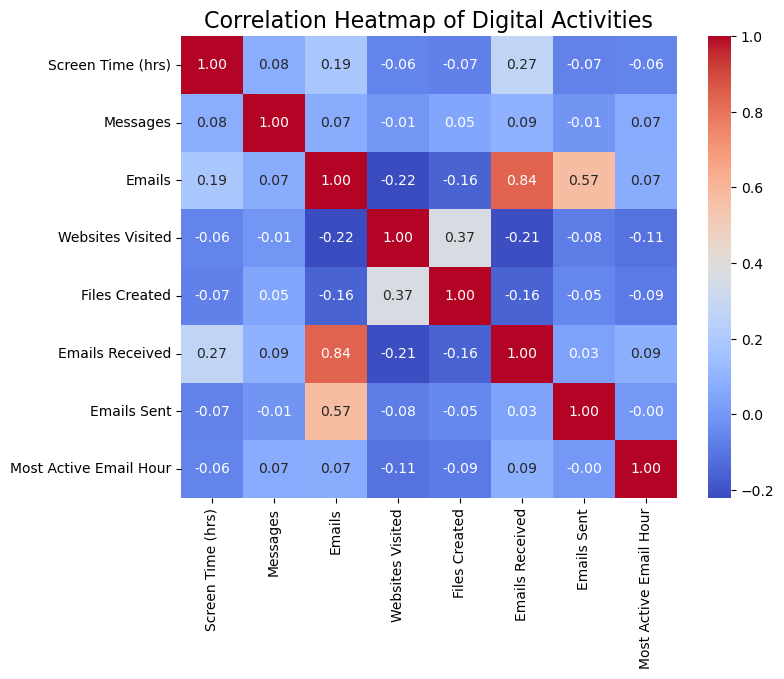

In [10]:
#5. Active Hours Heatmap
numeric_data = my_data.select_dtypes(include=['number'])

# Correlation heatmap
plt.figure(figsize=(8,6))
sns.heatmap(numeric_data.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Digital Activities", fontsize=16)
plt.show()


In [11]:
#Top Apps Used (Word Cloud)

apps_text = " ".join(my_data['Most Used Apps'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(apps_text)

plt.figure(figsize=(10,6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Most Used Apps", fontsize=16)
plt.show()


NameError: name 'WordCloud' is not defined

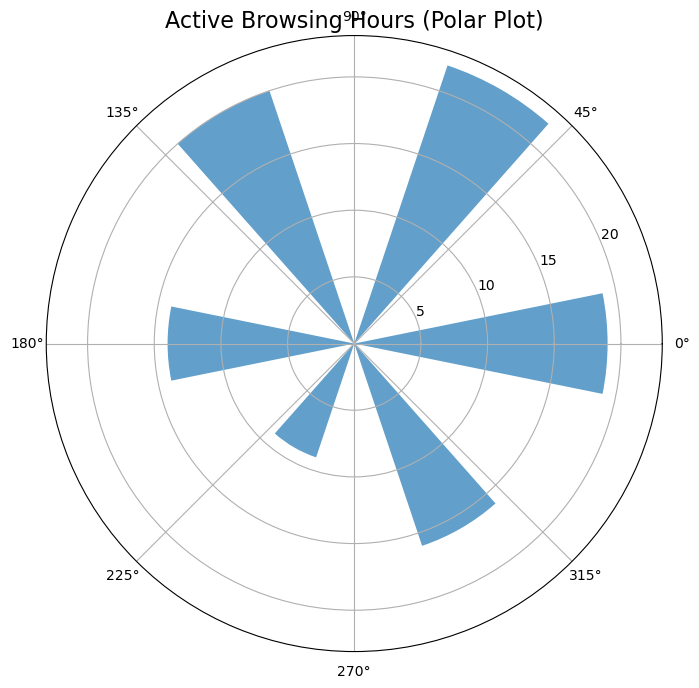

In [12]:
#Circular (Polar) Plot for Active Browsing Hours
plt.figure(figsize=(8,8))
hours = my_data["Active Browsing Hours"].value_counts().sort_index()

theta = np.linspace(0, 2*np.pi, len(hours), endpoint=False)
r = hours.values

plt.subplot(projection="polar")
bars = plt.bar(theta, r, width=0.4, alpha=0.7)

plt.title("Active Browsing Hours (Polar Plot)", fontsize=16)
plt.show()


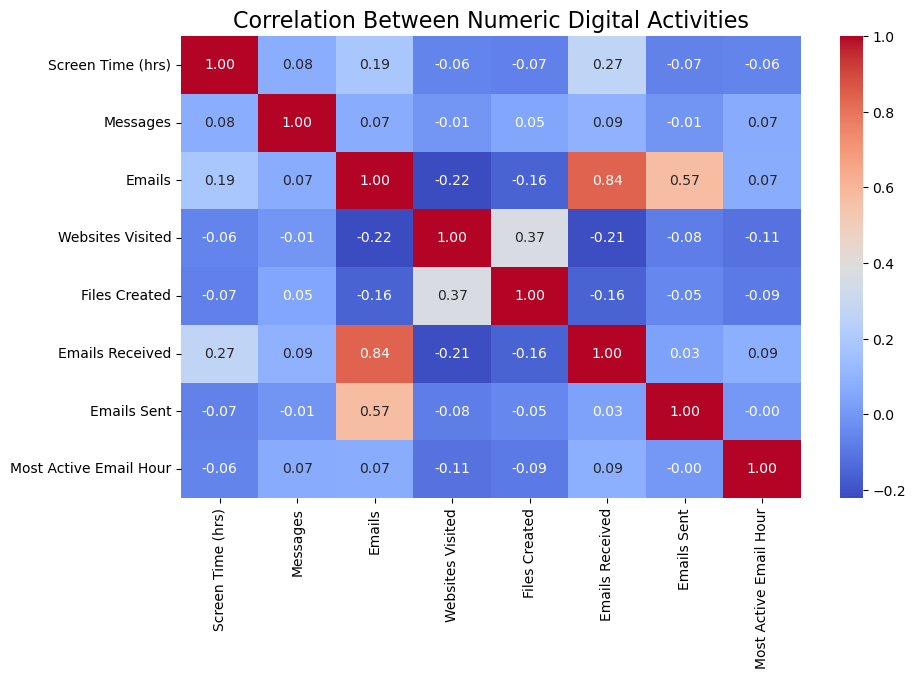

In [13]:
#Correlation Heatmap (Beautiful Insight!)
# Only take numeric columns
numeric_data = my_data.select_dtypes(include=['number'])

plt.figure(figsize=(10,6))
sns.heatmap(numeric_data.corr(), annot=True, cmap="coolwarm", fmt=".2f")

plt.title("Correlation Between Numeric Digital Activities", fontsize=16)
plt.show()


